# SVD image compression
**Explanation:** The original image has size $n \times n = 1024$ which means the size fo the image is $32 \times 32$. However, when we compress images, we are actually saving $U_k, \Sigma_k, V_k^T$ where $U_k$ is $n \times k$, $\Sigma_k$ is $k \times k$, and $V_k^T$ is $k \times n$. Therefore, we are storing $(n \times k) + (k \times k) + (k \times n) = 2nk + k^2$. In order to truly compress the images ot get smaller than $1024$ elements, we will need $2nk + k^2 = 64k + k^2 = k(k + 64) < 1024$. The solution to this is $k < \approx 13.26$ so we will need to compress with saving only $13$ singular values or less.

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 61s 0us/step
Compression with k = 2
Image 1:
  Original size: 1024 elements
  Compressed size: 132 elements
Image 2:
  Original size: 1024 elements
  Compressed size: 132 elements
Image 3:
  Original size: 1024 elements
  Compressed size: 132 elements
Image 4:
  Original size: 1024 elements
  Compressed size: 132 elements
Image 5:
  Original size: 1024 elements
  Compressed size: 132 elements



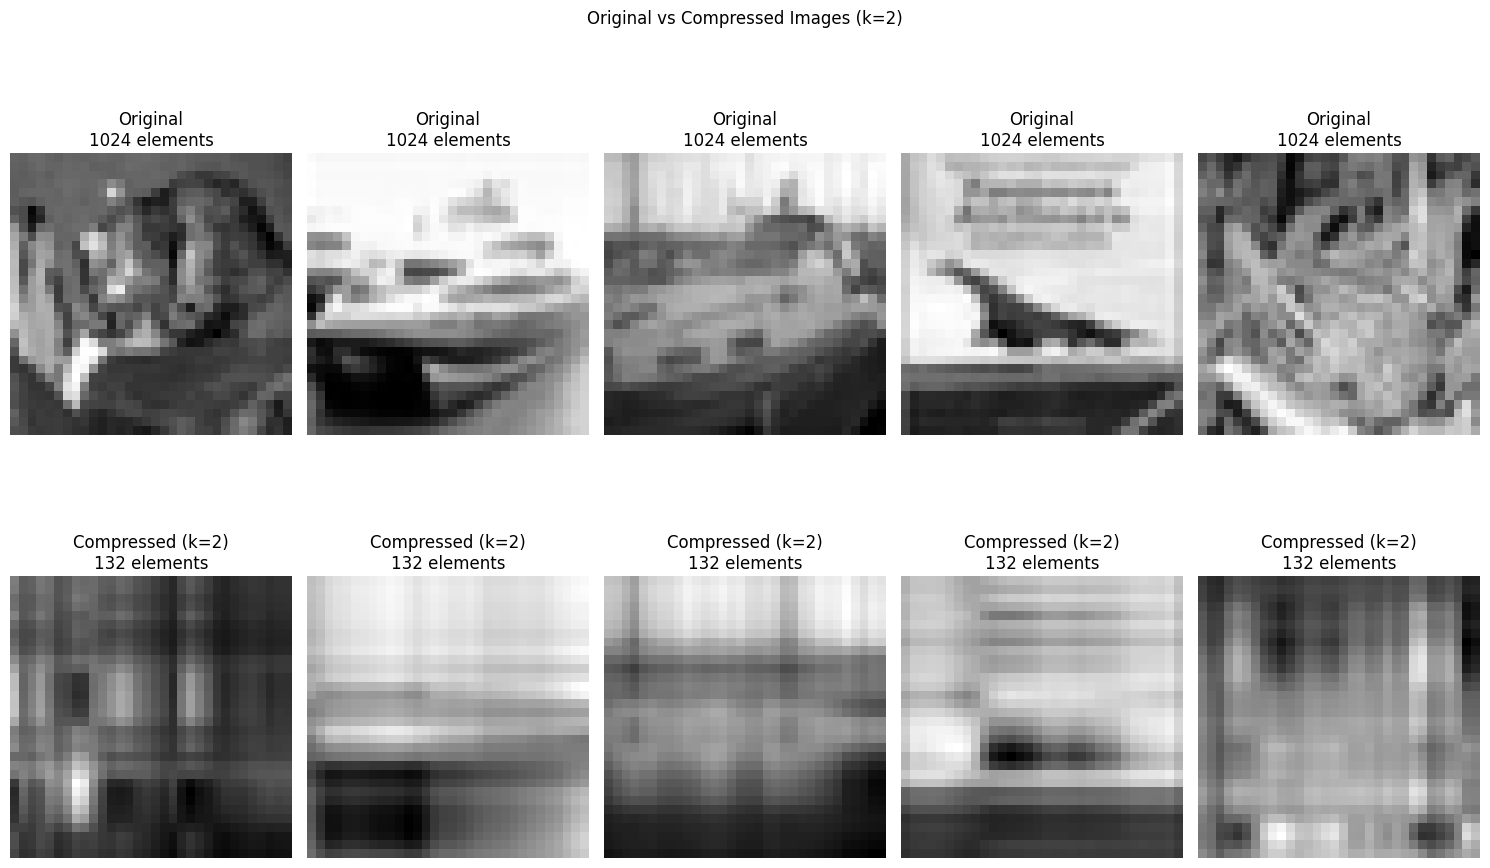

Compression with k = 5
Image 1:
  Original size: 1024 elements
  Compressed size: 345 elements
Image 2:
  Original size: 1024 elements
  Compressed size: 345 elements
Image 3:
  Original size: 1024 elements
  Compressed size: 345 elements
Image 4:
  Original size: 1024 elements
  Compressed size: 345 elements
Image 5:
  Original size: 1024 elements
  Compressed size: 345 elements



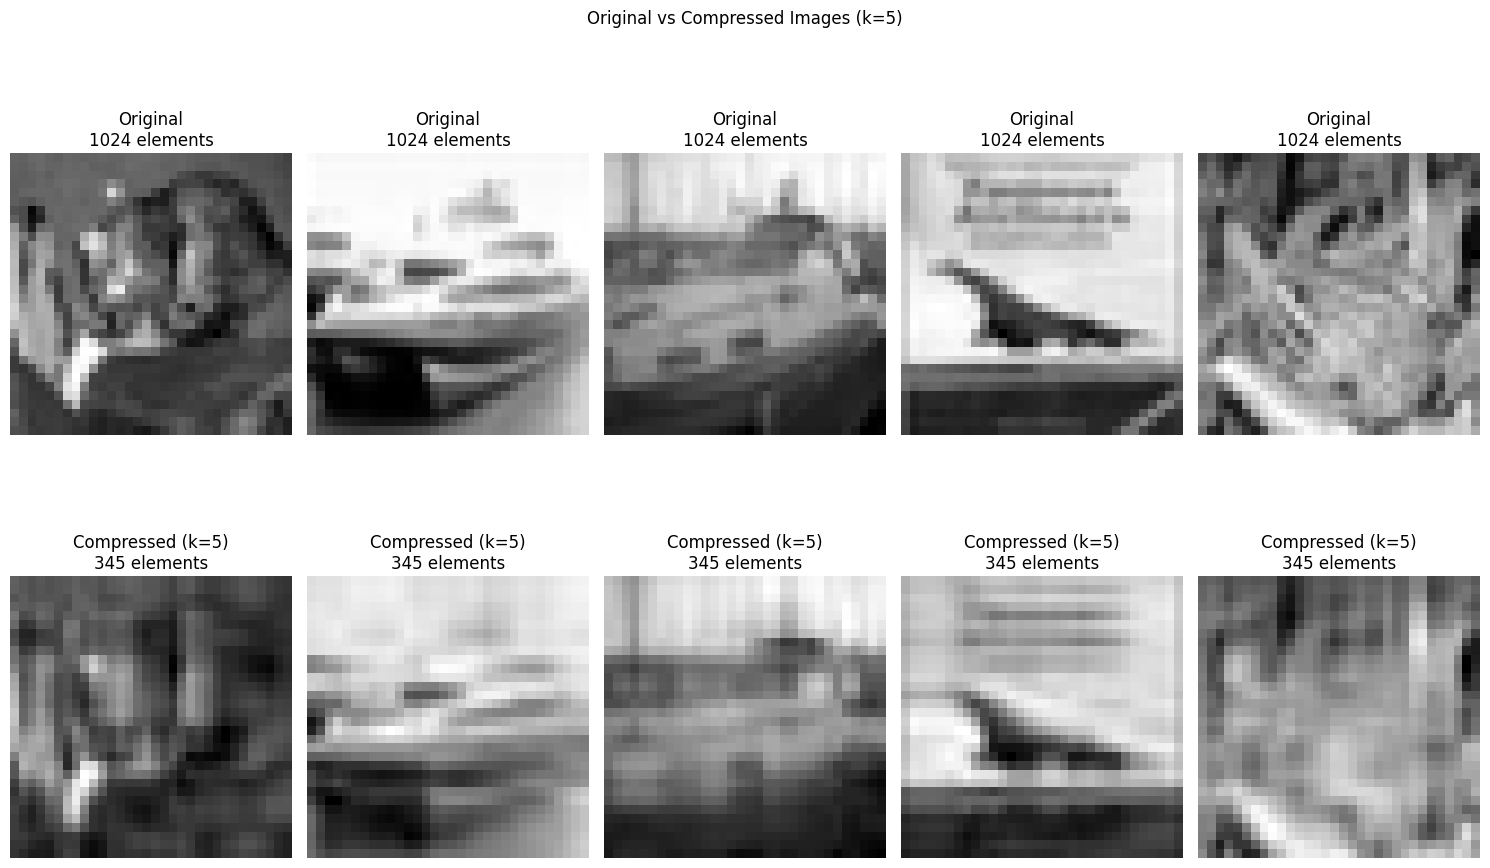

Compression with k = 10
Image 1:
  Original size: 1024 elements
  Compressed size: 740 elements
Image 2:
  Original size: 1024 elements
  Compressed size: 740 elements
Image 3:
  Original size: 1024 elements
  Compressed size: 740 elements
Image 4:
  Original size: 1024 elements
  Compressed size: 740 elements
Image 5:
  Original size: 1024 elements
  Compressed size: 740 elements



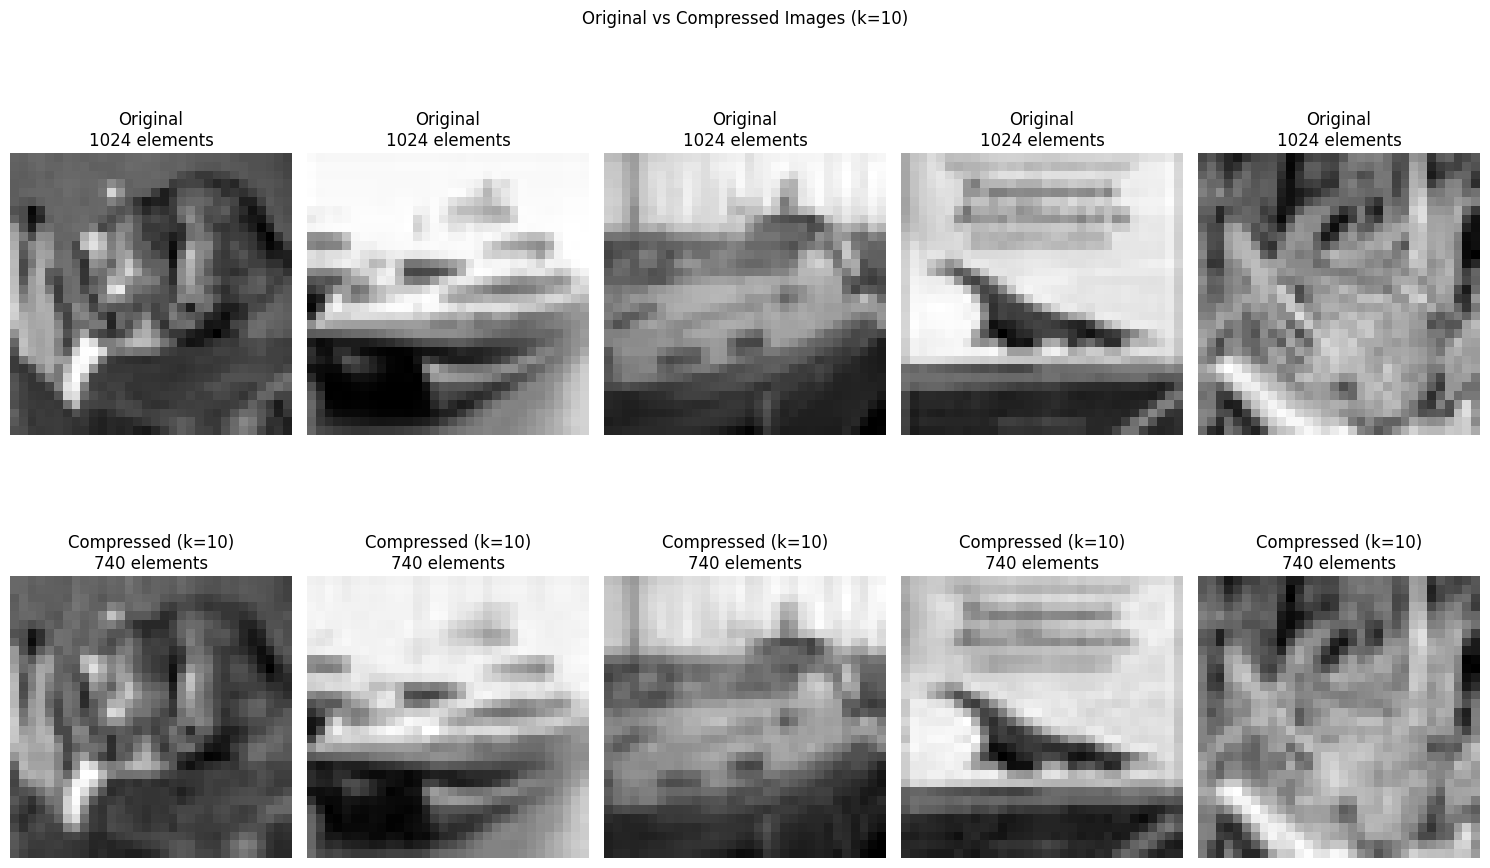

Compression with k = 13
Image 1:
  Original size: 1024 elements
  Compressed size: 1001 elements
Image 2:
  Original size: 1024 elements
  Compressed size: 1001 elements
Image 3:
  Original size: 1024 elements
  Compressed size: 1001 elements
Image 4:
  Original size: 1024 elements
  Compressed size: 1001 elements
Image 5:
  Original size: 1024 elements
  Compressed size: 1001 elements



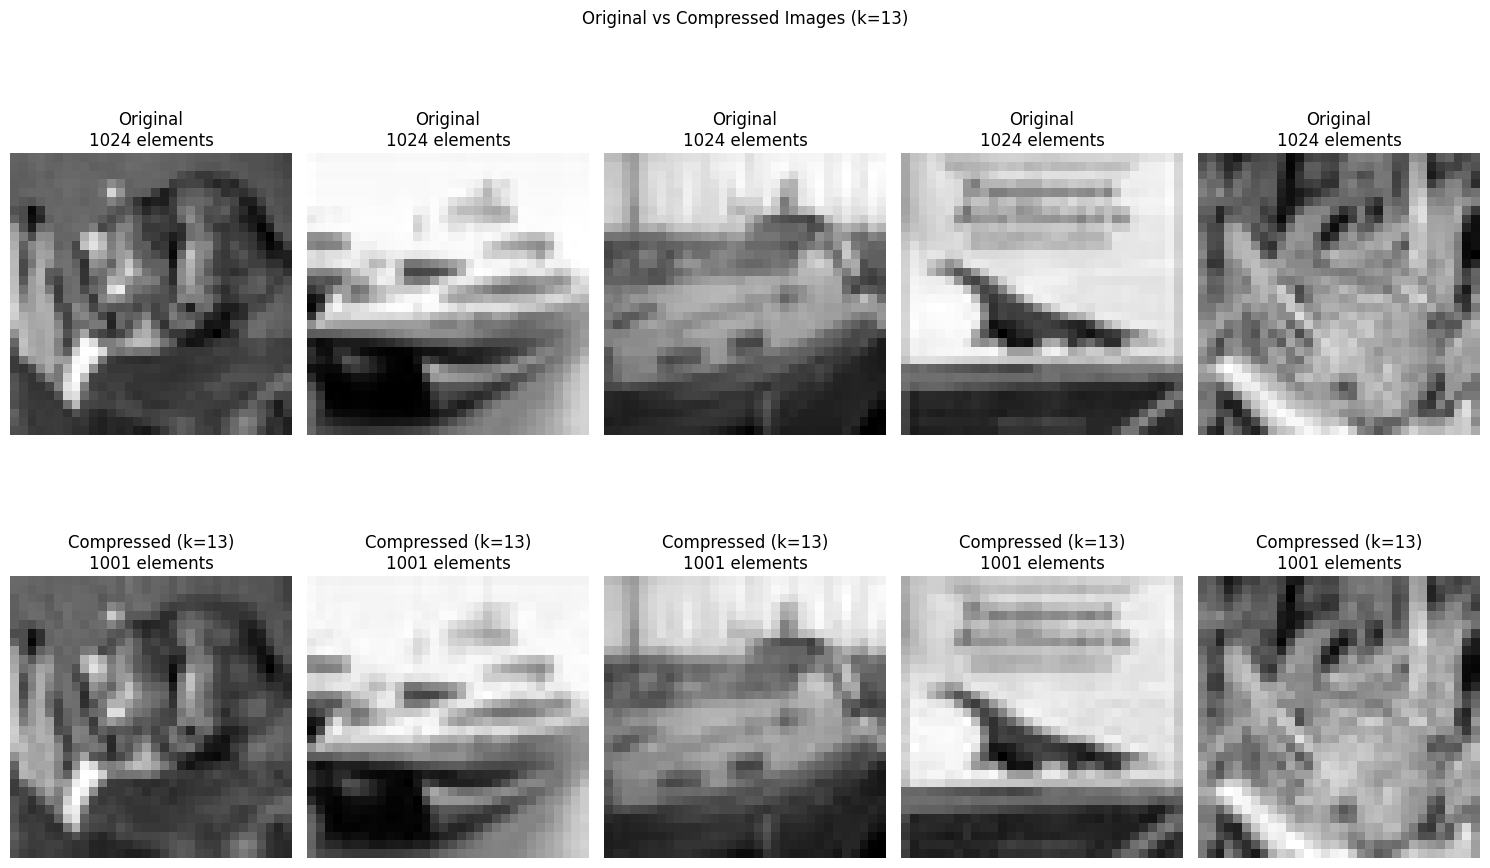

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from skimage.color import rgb2gray

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert the first 5 test images to grayscale
sample_images = x_test[:5]
sample_images_gray = np.array([rgb2gray(img) for img in sample_images])

# Function to apply SVD and compress an image
def svd_compress(image, k):
    U, S, VT = np.linalg.svd(image, full_matrices=False)
    S = np.diag(S)
    # Retain only the top k singular values
    U_k = U[:, :k]
    S_k = S[:k, :k]
    VT_k = VT[:k, :]
    # Reconstruct the compressed image
    compressed_image = np.dot(U_k, np.dot(S_k, VT_k))
    return U_k, S_k, VT_k, compressed_image

# Adjusted k-values for 32x32 images
k_values = [2, 5, 10, 13]

# Display original and compressed images with sizes
for k in k_values:
    print(f"Compression with k = {k}")
    plt.figure(figsize=(15, 10))

    for i, image in enumerate(sample_images_gray):
        # Original image
        original_size = image.size  # Total pixels in the original image
        plt.subplot(2, len(sample_images_gray), i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Original\n{original_size} elements")
        plt.axis('off')

        # Compressed image
        U_k, S_k, VT_k, compressed_image = svd_compress(image, k)
        compressed_size = U_k.size + S_k.size + VT_k.size  # Total elements in compressed representation

        plt.subplot(2, len(sample_images_gray), i + 1 + len(sample_images_gray))
        plt.imshow(compressed_image, cmap='gray')
        plt.title(f"Compressed (k={k})\n{compressed_size} elements")
        plt.axis('off')

        # Print sizes in the console
        print(f"Image {i + 1}:")
        print(f"  Original size: {original_size} elements")
        print(f"  Compressed size: {compressed_size} elements")
    print()
    plt.suptitle(f"Original vs Compressed Images (k={k})")
    plt.tight_layout()
    plt.show()
